In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import pair_confusion_matrix
from clustergram import Clustergram


In [90]:
data = pd.read_csv('SouthGermanCredit.asc', delimiter=' ')
data.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


**Немає нулів**

<Axes: >

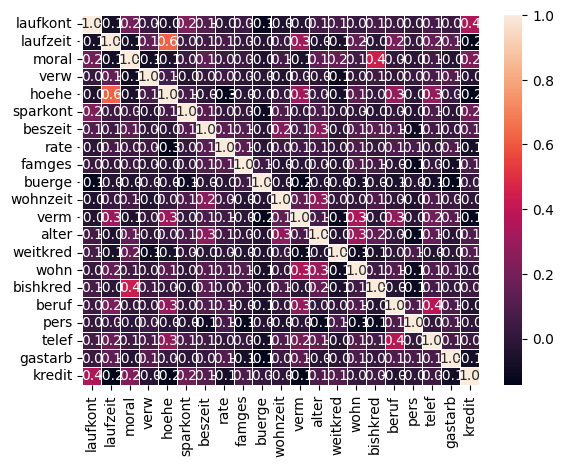

In [92]:
sns.heatmap(data=data.corr(), annot=True, fmt='.1f', robust=True, linewidths=0.5)

**Кореляцій немає**

In [93]:
X = data.drop(columns='kredit')
y = data.kredit
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
distortions = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto").fit(X)
    print(kmeans.n_features_in_)
    ss = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append (ss)
    dbs = davies_bouldin_score(X, kmeans.labels_)
    davies_bouldin_scores.append (dbs)
    chs = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz_scores.append (chs)
    distortions.append(kmeans.inertia_)
    print(kmeans.inertia_, ss, dbs, chs)
    print(pair_confusion_matrix(y, kmeans.labels_))

20
2405520268.2169976 0.7222312904192741 0.49804244832320094 2304.5427653983297
[[132312 287688]
 [153830 425170]]
20
1278248235.961515 0.6475684539923428 0.5169820505824714 2605.8943897103436
[[193754 226246]
 [227492 351508]]
20
649918537.9522746 0.6117259380414384 0.492608777518324 3734.3997180546016
[[261764 158236]
 [344012 234988]]
20
472677233.4893952 0.5775789185768772 0.5041743075475521 3940.416508665849
[[312466 107534]
 [418576 160424]]
20
320674944.59600717 0.5795422409850739 0.5006942489648901 4736.137480967616
[[314068 105932]
 [420322 158678]]
20
295257402.0019878 0.5746556663893486 0.48471430214611566 4296.444185473299
[[315212 104788]
 [421950 157050]]
20
227204450.4190152 0.5658924695069548 0.4777222499345415 4823.336870291025
[[326642  93358]
 [439270 139730]]
20
182805711.79619962 0.5052358115732117 0.5144370182633595 5270.24787972231
[[347870  72130]
 [471280 107720]]
20
143230436.8968171 0.5027453232327097 0.5012027209670257 6003.516666792827
[[349904  70096]
 [47

**За метриками найкраще - 5 кластерів, ss менша, dbs більша, chs менша**

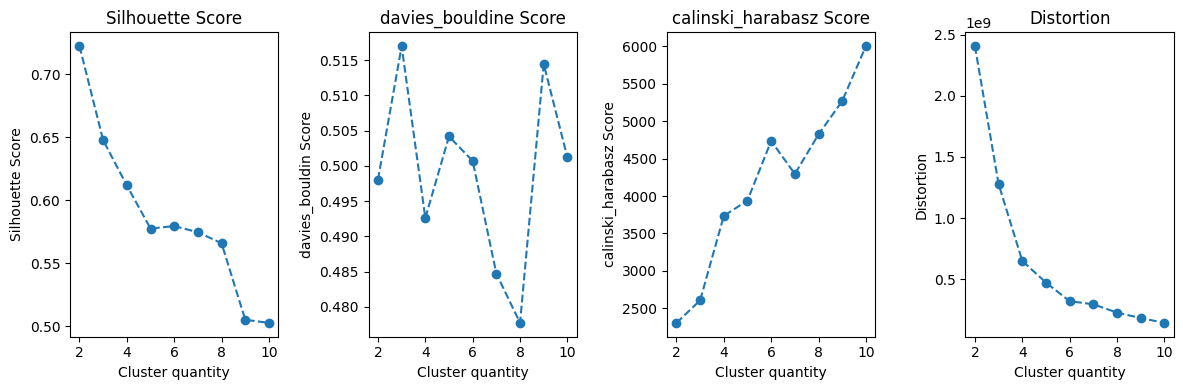

In [94]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('davies_bouldin Score')
plt.title('davies_bouldine Score')

plt.subplot(1, 4, 3)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('calinski_harabasz Score')
plt.title('calinski_harabasz Score')

plt.subplot(1, 4, 4)
plt.plot(range(2, 11), distortions, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('Distortion')
plt.title('Distortion')

plt.tight_layout()
plt.show()

**Графіки це підтверджують**

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.006 seconds.
K=3 fitted in 0.006 seconds.
K=4 fitted in 0.006 seconds.
K=5 fitted in 0.007 seconds.
K=6 fitted in 0.006 seconds.
K=7 fitted in 0.005 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

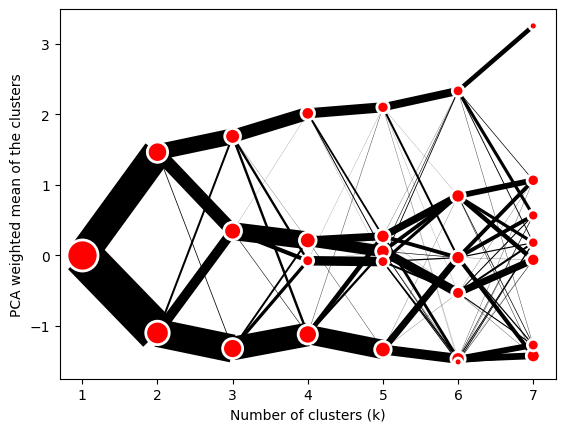

In [95]:
from sklearn.preprocessing import scale
df = scale(data.drop(columns=['kredit']).dropna())
cgram = Clustergram(range(1, 8))
cgram.fit(df)
cgram.plot()

**За діаграмою багато розгалуджень починаються після 4 кластера**

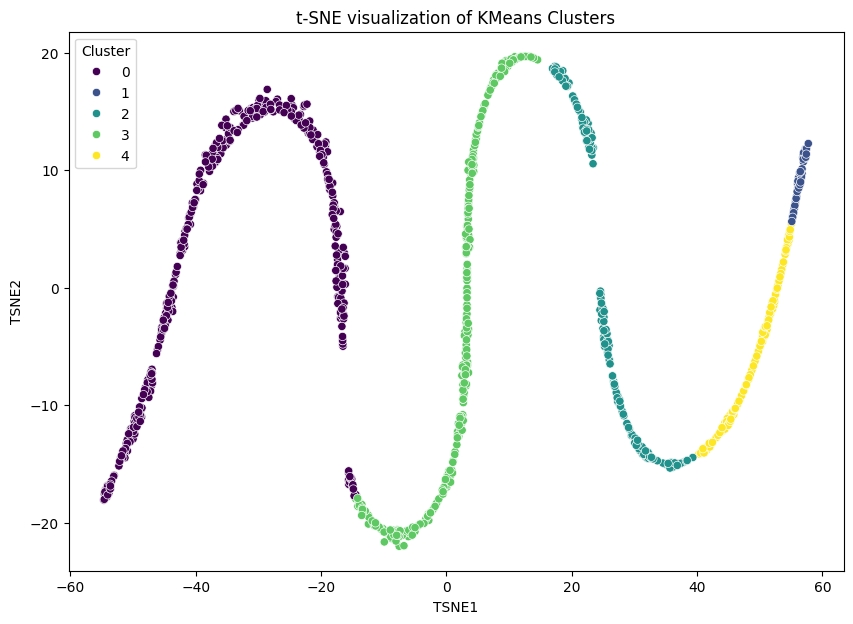

In [96]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X)

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results and the cluster labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = kmeans.labels_

# Plot t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=tsne_df, legend='full')
plt.title('t-SNE visualization of KMeans Clusters')
plt.show()

**За TSNE видно, що розподіл не зовсім нормальний, хотілося б 3 кластери, але можливо ця модель в даному випадку просто не підходить, при вказуванні 3 кластерів в кінці ситуація стає гіршою**